Cluster and GT comparison

GMM and GT comparison

In [1]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
pca_result =pd.read_csv('pca_dataframe.csv', low_memory=False).to_numpy()
df = pd.DataFrame(pca_result[:,:2])
y = pd.read_csv('ddos_dataset.csv', low_memory=False)['label'].to_numpy()
df['label'] = y.reshape(-1)

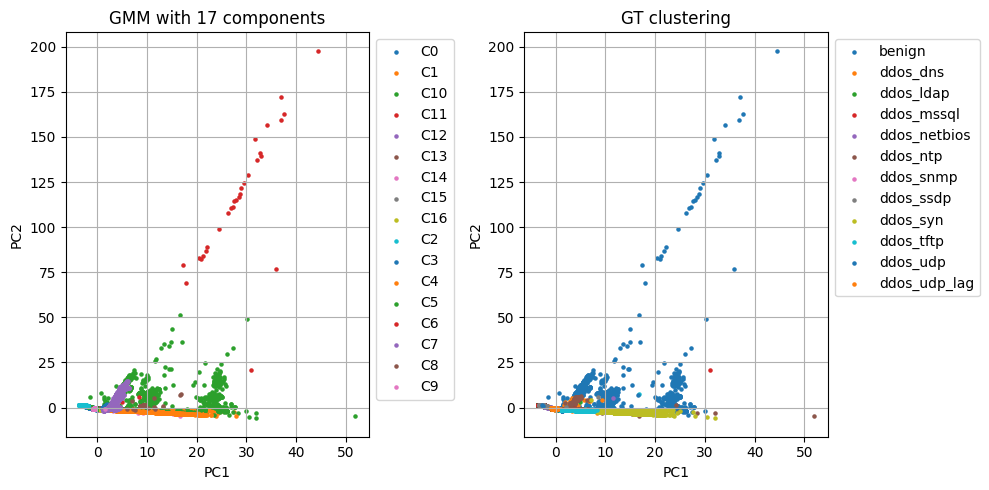

In [6]:
gmm = GaussianMixture(n_components=17, random_state=42, n_init=4, init_params='kmeans')
labels = gmm.fit_predict(pca_result)
df['cid_gmm'] = [f'C{x}' for x in labels]

fig, ax = plt.subplots(1, 2, figsize=(10,5))

for i in np.unique(df.cid_gmm):
    subdf = df[df.cid_gmm == i]
    ax[0].scatter(subdf[0], subdf[1], label=i, s=5)
lgnd = ax[0].legend(bbox_to_anchor=(1, 1), loc="upper left")
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title(f'GMM with 17 components')
ax[0].grid()

for i in np.unique(df.label):
    subdf = df[df.label == i]
    ax[1].scatter(subdf[0], subdf[1], label=i, s=5)

lgnd = ax[1].legend(bbox_to_anchor=(1, 1), loc="upper left")
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('GT clustering')
ax[1].grid()
plt.tight_layout()
plt.show()

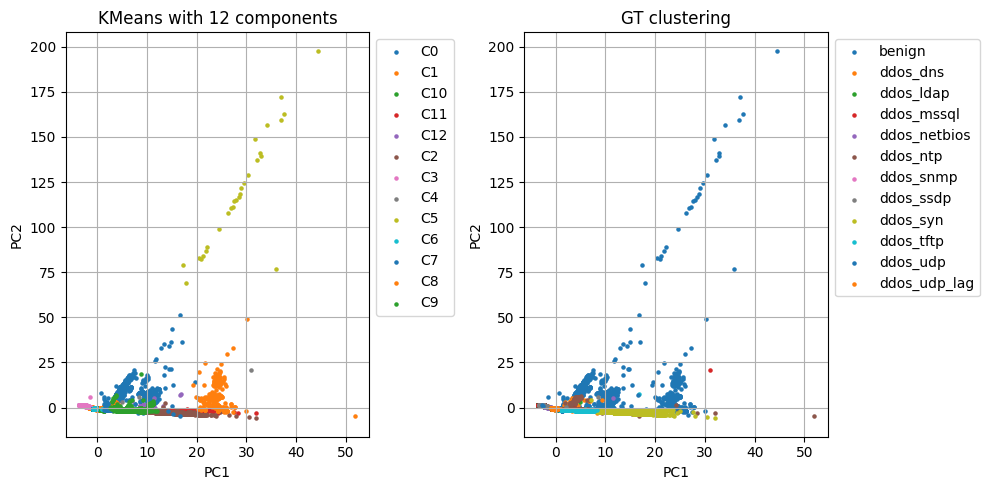

In [4]:
kmeans = KMeans(n_clusters=13, init='k-means++', random_state=42, n_init='auto')
labels = kmeans.fit_predict(pca_result)
df['cid_kmeans'] = [f'C{x}' for x in labels]

fig, ax = plt.subplots(1, 2, figsize=(10,5))

for i in np.unique(df.cid_kmeans):
    subdf = df[df.cid_kmeans == i]
    ax[0].scatter(subdf[0], subdf[1], label=i, s=5)
lgnd = ax[0].legend(bbox_to_anchor=(1, 1), loc="upper left")
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title(f'KMeans with 12 components')
ax[0].grid()

for i in np.unique(df.label):
    subdf = df[df.label == i]
    ax[1].scatter(subdf[0], subdf[1], label=i, s=5)

lgnd = ax[1].legend(bbox_to_anchor=(1, 1), loc="upper left")
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('GT clustering')
ax[1].grid()
plt.tight_layout()
plt.show()

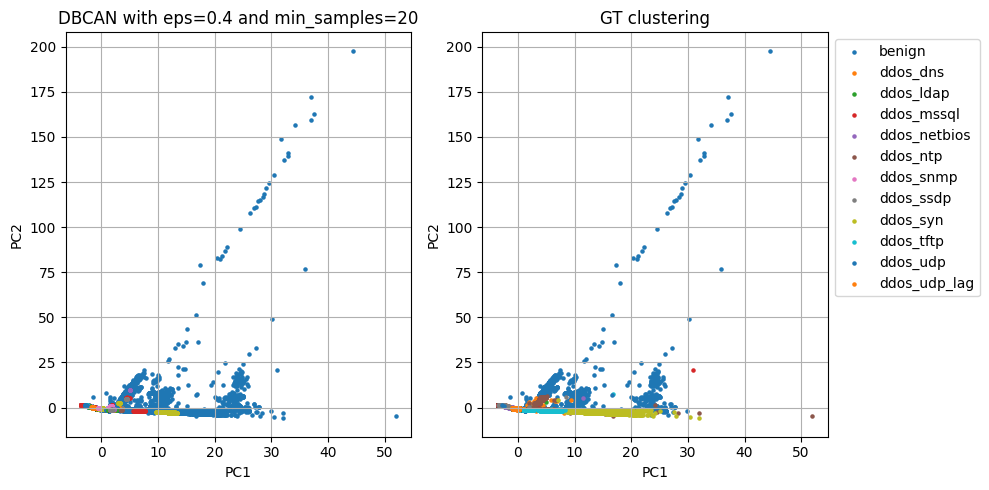

In [7]:
dbscan = DBSCAN(eps=0.4, min_samples=20)
labels = dbscan.fit_predict(pca_result)
df['cid_dbscan'] = [f'C{x}' for x in labels]

fig, ax = plt.subplots(1, 2, figsize=(10,5))

for i in np.unique(df.cid_dbscan):
    subdf = df[df.cid_dbscan == i]
    ax[0].scatter(subdf[0], subdf[1], label=i, s=5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title(f'DBCAN with eps=0.4 and min_samples=20')
ax[0].grid()

for i in np.unique(df.label):
    subdf = df[df.label == i]
    ax[1].scatter(subdf[0], subdf[1], label=i, s=5)

lgnd = ax[1].legend(bbox_to_anchor=(1, 1), loc="upper left")
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('GT clustering')
ax[1].grid()
plt.tight_layout()
plt.show()

In [9]:
df = pd.read_csv('ddos_scaled.csv', low_memory=False).drop(columns='Unnamed: 0')
pca_result = pd.read_csv('pca_dataframe.csv', low_memory=False)

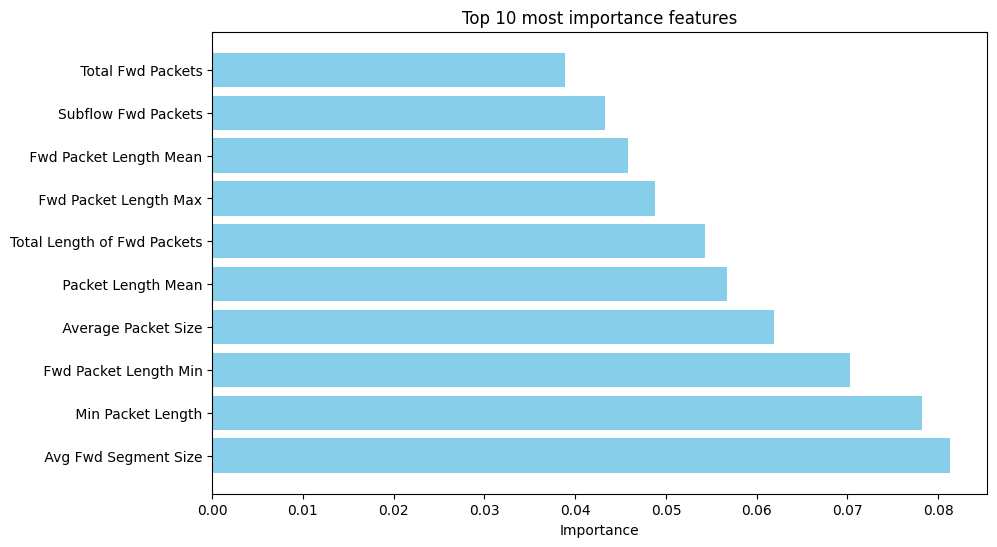

In [10]:
k_model = KMeans(n_clusters=13, init='k-means++', random_state=42, n_init='auto')
labels = k_model.fit(pca_result).labels_

clf = RandomForestClassifier()
clf.fit(df, labels)

feature_importance = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature':df.columns, 'Importance':feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 most importance features')
plt.show()

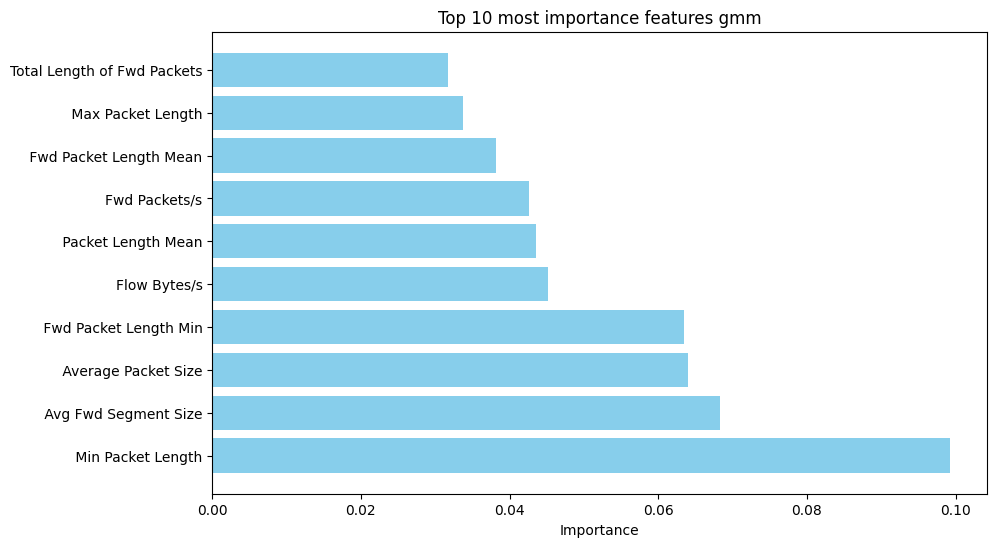

In [11]:
gmm = GaussianMixture(n_components=17, random_state=42, n_init=4, init_params='kmeans')
labels = gmm.fit_predict(pca_result)

rf_gmm = RandomForestClassifier()
rf_gmm.fit(df, labels)

feature_importance = rf_gmm.feature_importances_
feature_importance_df = pd.DataFrame({'Feature':df.columns, 'Importance':feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 most importance features gmm')
plt.show()

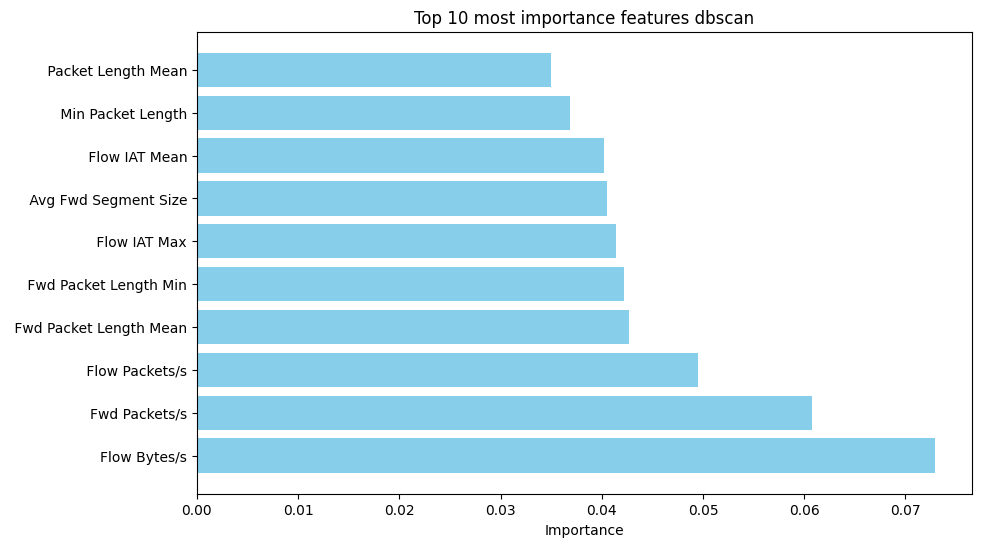

In [12]:
dbscan = DBSCAN(eps=0.4, min_samples=20)
labels = dbscan.fit_predict(pca_result)

rf_dbscan = RandomForestClassifier()
rf_dbscan.fit(df, labels)

feature_importance = rf_dbscan.feature_importances_
feature_importance_df = pd.DataFrame({'Feature':df.columns, 'Importance':feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 most importance features dbscan')
plt.show()

In [12]:
import shap
from xgboost import XGBClassifier

In [15]:
model = XGBClassifier().fit(df, labels)

In [17]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(df)

[17:09:04] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


nuovo record

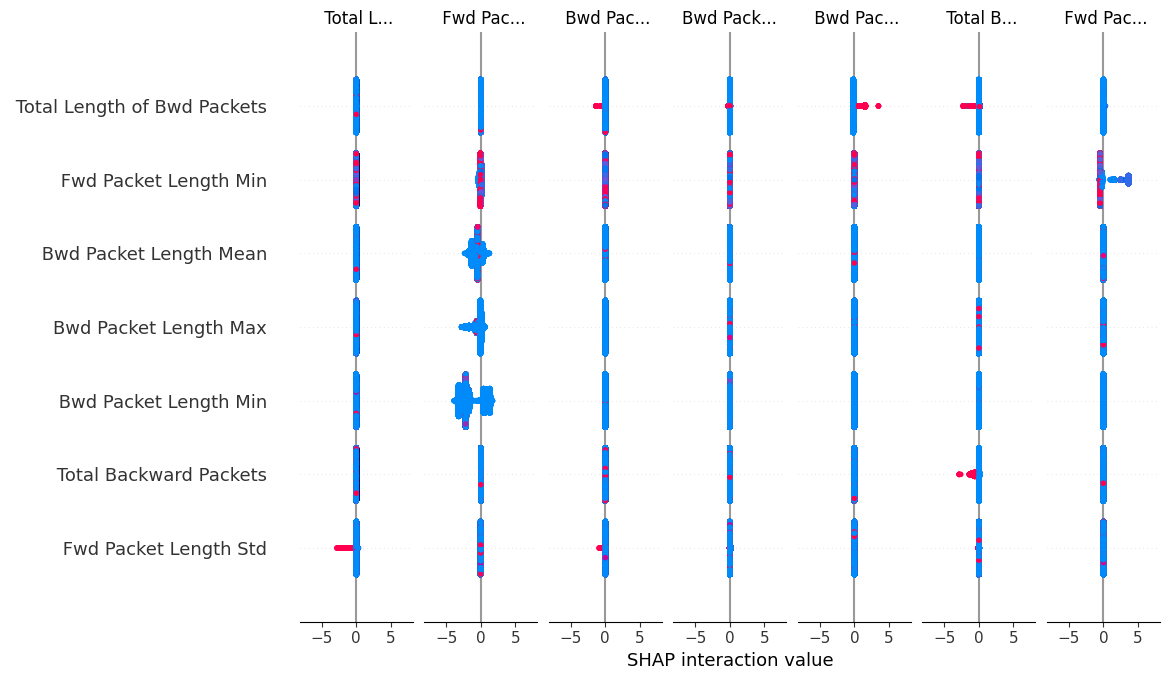

In [13]:
shap.summary_plot(shap_values.values, df, sort=True, plot_type="bar")

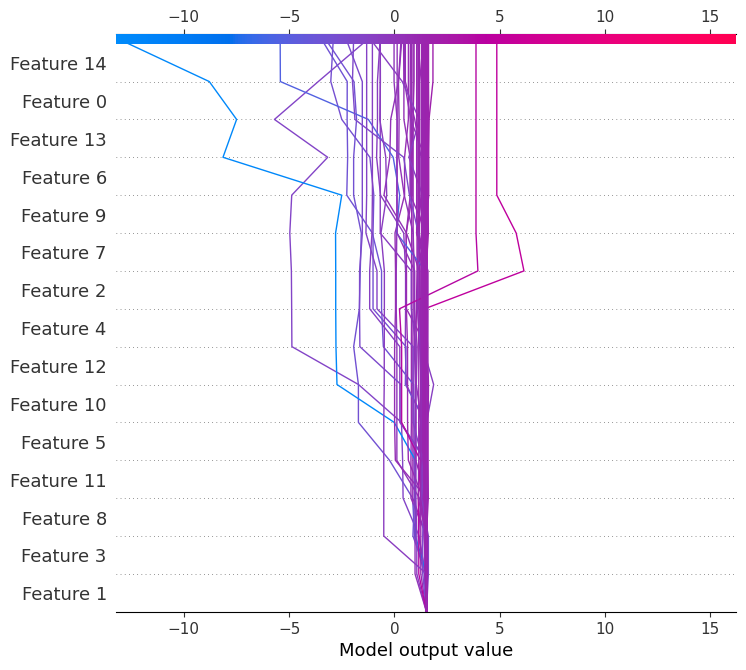

In [27]:
shap.decision_plot(explainer.expected_value[14], shap_values.values[14])

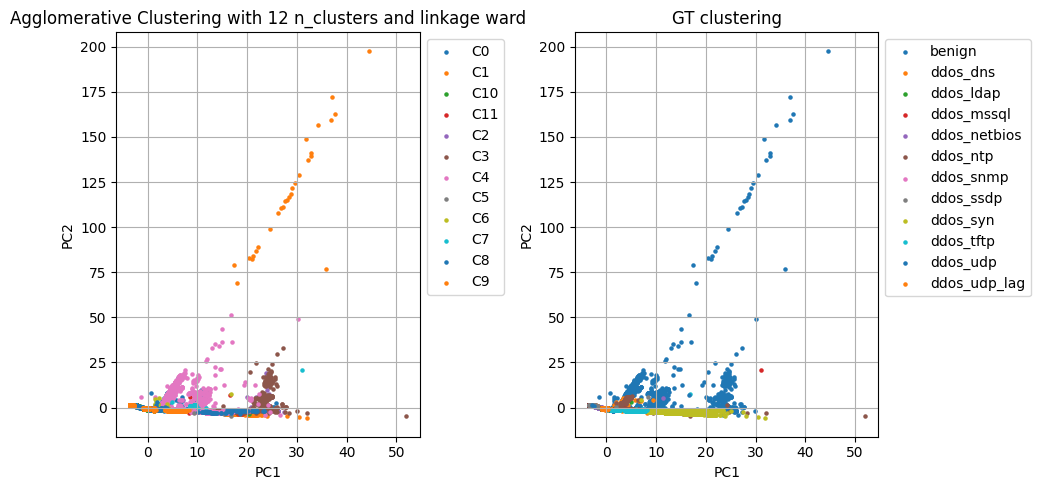

In [5]:
batch_size = 10000
aggC = AgglomerativeClustering(n_clusters=12, linkage='ward')
labels = []

for i in range(0, pca_result.shape[0], batch_size):
    batch = pca_result[i:i+batch_size, :]
    labels.append(aggC.fit_predict(batch))
labels = np.concatenate(labels)

df['cid_aggC'] = [f'C{x}' for x in labels]
df['label'] = y.reshape(-1)

fig, ax = plt.subplots(1, 2, figsize=(10,5))

for i in np.unique(df.cid_aggC):
    subdf = df[df.cid_aggC == i]
    ax[0].scatter(subdf[0], subdf[1], label=i, s=5)
lgnd = ax[0].legend(bbox_to_anchor=(1, 1), loc="upper left")
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title(f'Agglomerative Clustering with 12 n_clusters and linkage ward')
ax[0].grid()

for i in np.unique(df.label):
    subdf = df[df.label == i]
    ax[1].scatter(subdf[0], subdf[1], label=i, s=5)

lgnd = ax[1].legend(bbox_to_anchor=(1, 1), loc="upper left")
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('GT clustering')
ax[1].grid()
plt.tight_layout()
plt.show()

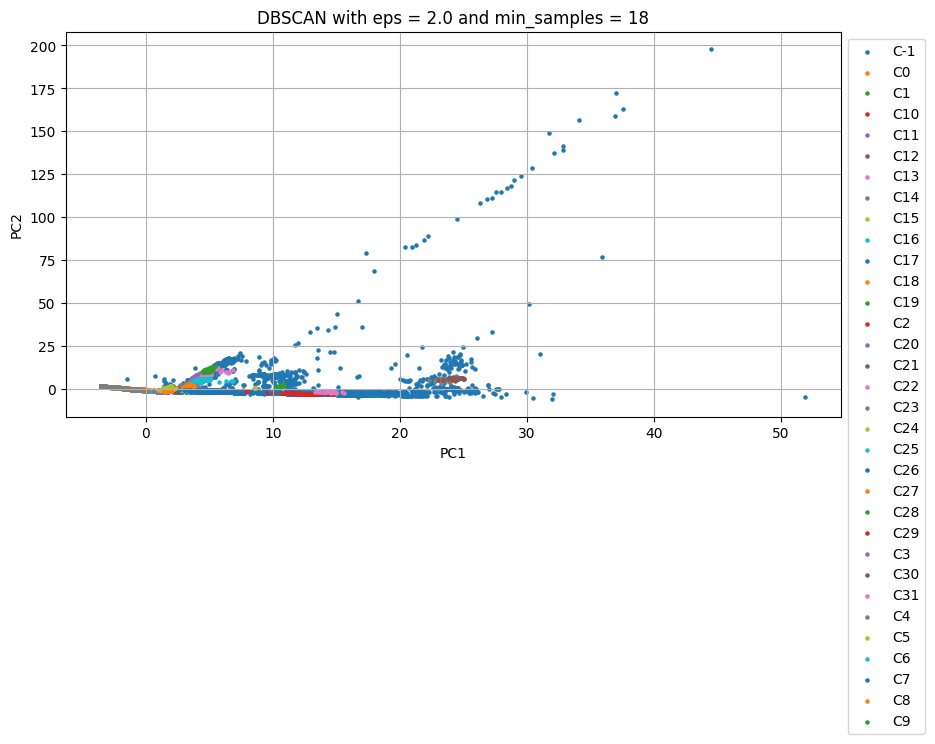

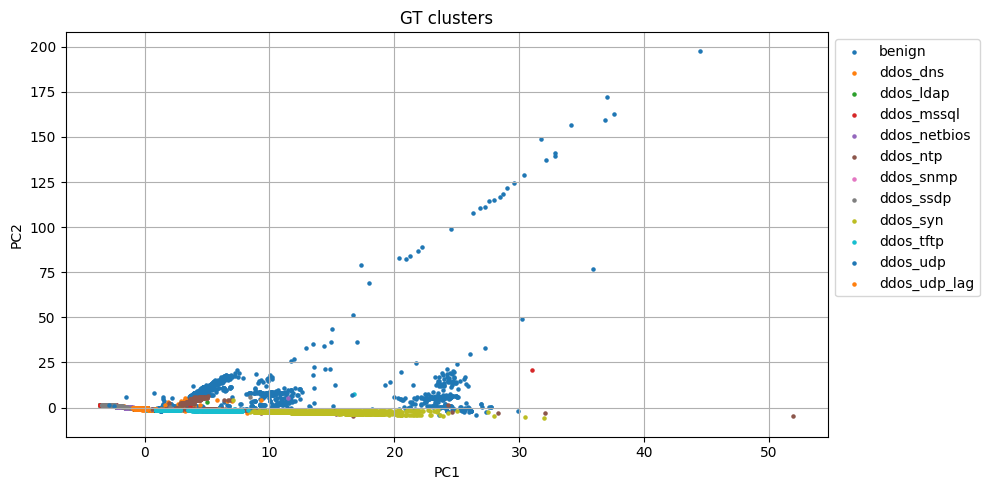

In [6]:
best_eps = 2.0
best_min = 18
dbscan = DBSCAN(eps=best_eps, min_samples=best_min)
labels = dbscan.fit_predict(pca_result)
df['cid_dbscan'] = [f'C{x}' for x in labels]
fig, ax = plt.subplots(figsize=(10,5))

for i in np.unique(df.cid_dbscan):
    subdf = df[df.cid_dbscan == i]
    ax.scatter(subdf[0], subdf[1], label=i, s=5)
ax.grid()
lgnd = ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title(f'DBSCAN with eps = {best_eps} and min_samples = {best_min}')

fig, ax = plt.subplots(figsize=(10, 5))
for i in np.unique(df.label):
    subdf = df[df.label == i]
    ax.scatter(subdf[0], subdf[1], label=i, s=5)
ax.grid()
lgnd = plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('GT clusters')

plt.tight_layout()
plt.show()

In [7]:
df[2] = pca_result[:, 2]
df

,0,1,label,cid_gmm,cid_kmeans,cid_aggC,cid_dbscan,2
0,-0.478653,-0.589533,ddos_dns,C0,C8,C4,C0,0.998409
1,-0.464128,-0.267606,ddos_dns,C2,C7,C10,C0,0.902600
2,-0.523195,-0.620103,ddos_dns,C0,C9,C4,C0,1.268103
3,-0.459103,-0.568340,ddos_dns,C0,C9,C4,C0,1.348160
4,-0.490045,-0.592144,ddos_dns,C0,C9,C4,C0,1.310972
...,...,...,...,...,...,...,...,...
64234,-0.753011,-0.575134,ddos_udp_lag,C2,C1,C7,C0,0.697743
64235,0.190764,-0.564125,ddos_udp_lag,C2,C8,C8,C0,1.542294
64236,-0.722891,-0.590632,ddos_udp_lag,C2,C1,C7,C0,0.743384
64237,0.191507,-0.546475,ddos_udp_lag,C2,C8,C0,C0,1.541808


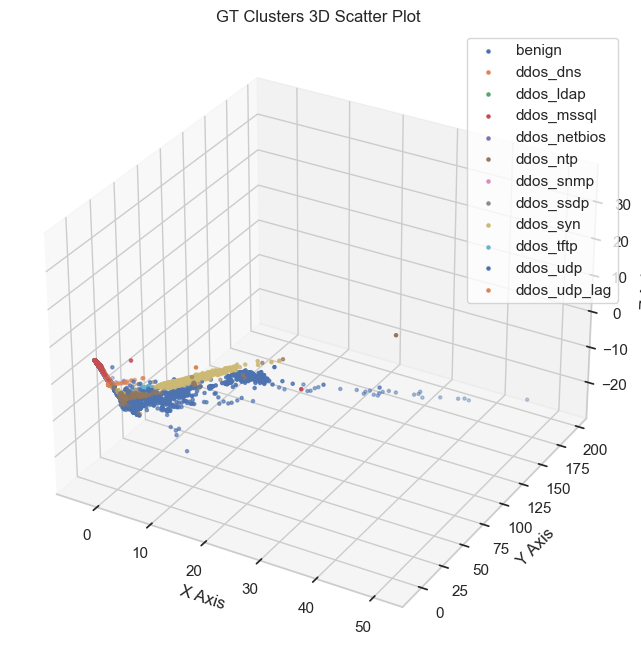

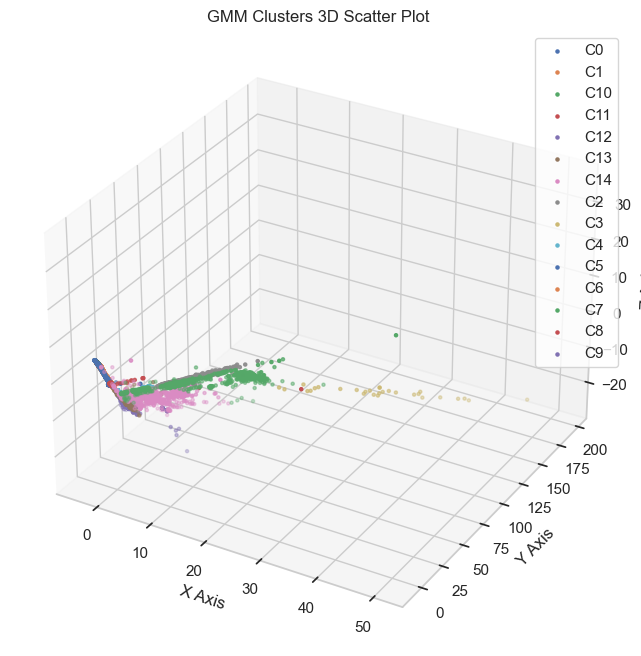

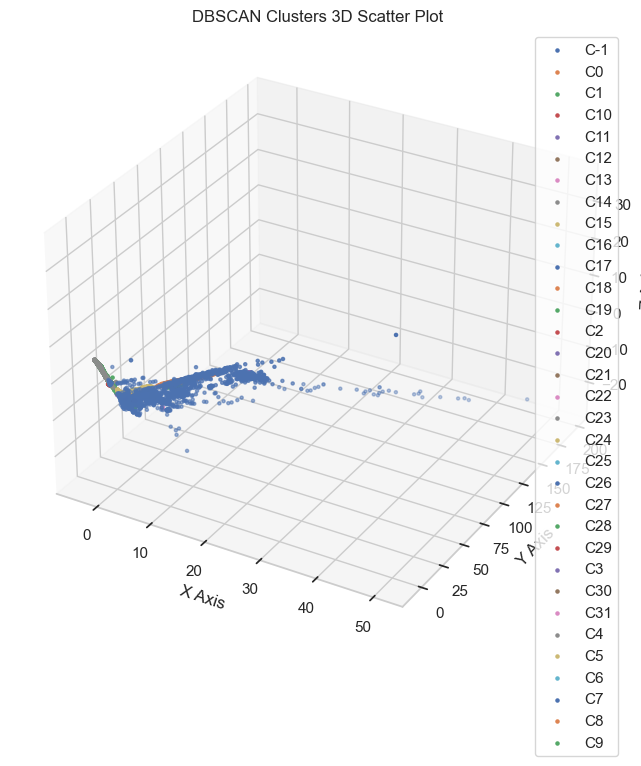

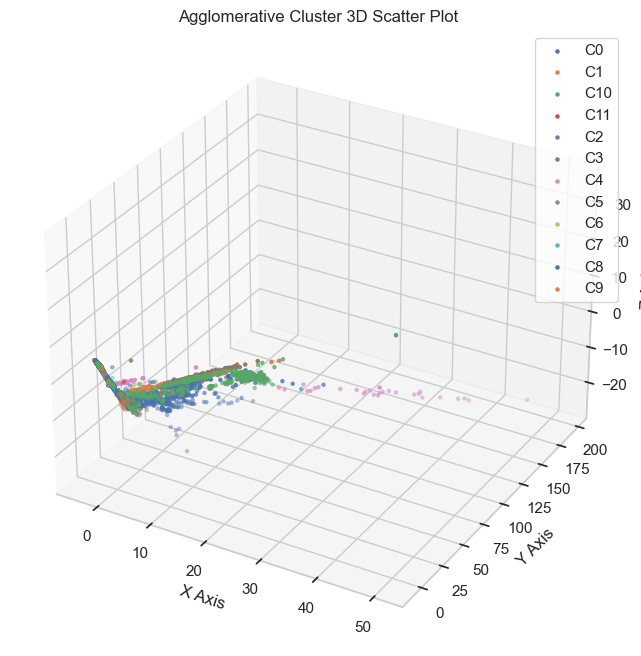

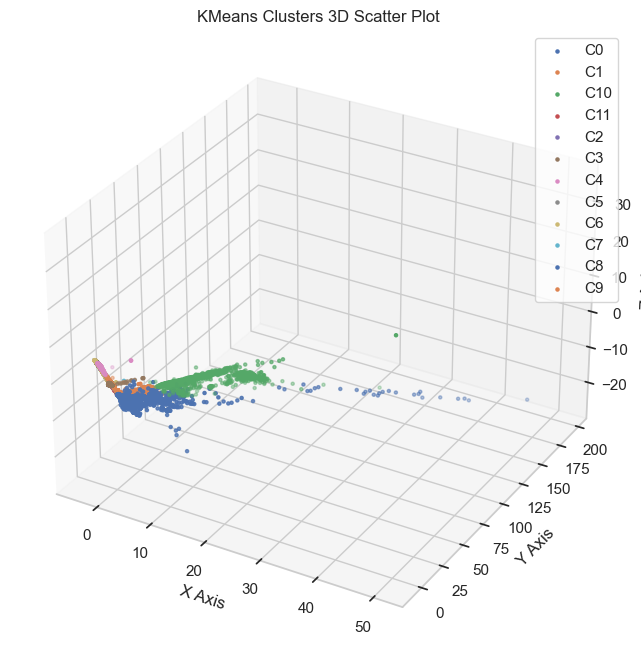

In [8]:
sns.set(style="whitegrid")
# Create a 3D scatter plot with color-coded clusters using Seaborn
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in np.unique(df.label):
    subdf = df[df.label == i]
    ax.scatter(subdf[0], subdf[1], subdf[2], label=i, s=5)

# Customize the plot
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('GT Clusters 3D Scatter Plot')
ax.legend()

# Show the plot
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in np.unique(df.cid_gmm):
    subdf = df[df.cid_gmm == i]
    ax.scatter(subdf[0], subdf[1], subdf[2], label=i, s=5)

# Customize the plot
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('GMM Clusters 3D Scatter Plot')
ax.legend()

# Show the plot
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in np.unique(df.cid_dbscan):
    subdf = df[df.cid_dbscan == i]
    ax.scatter(subdf[0], subdf[1], subdf[2], label=i, s=5)

# Customize the plot
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('DBSCAN Clusters 3D Scatter Plot')
ax.legend()

# Show the plot
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in np.unique(df.cid_aggC):
    subdf = df[df.cid_aggC == i]
    ax.scatter(subdf[0], subdf[1], subdf[2], label=i, s=5)

# Customize the plot
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('Agglomerative Cluster 3D Scatter Plot')
ax.legend()

# Show the plot
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in np.unique(df.cid_kmeans):
    subdf = df[df.cid_kmeans == i]
    ax.scatter(subdf[0], subdf[1], subdf[2], label=i, s=5)

# Customize the plot
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('KMeans Clusters 3D Scatter Plot')
ax.legend()

# Show the plot
plt.show()

In [9]:
df

,0,1,label,cid_gmm,cid_kmeans,cid_aggC,cid_dbscan,2
0,-0.478653,-0.589533,ddos_dns,C0,C8,C4,C0,0.998409
1,-0.464128,-0.267606,ddos_dns,C2,C7,C10,C0,0.902600
2,-0.523195,-0.620103,ddos_dns,C0,C9,C4,C0,1.268103
3,-0.459103,-0.568340,ddos_dns,C0,C9,C4,C0,1.348160
4,-0.490045,-0.592144,ddos_dns,C0,C9,C4,C0,1.310972
...,...,...,...,...,...,...,...,...
64234,-0.753011,-0.575134,ddos_udp_lag,C2,C1,C7,C0,0.697743
64235,0.190764,-0.564125,ddos_udp_lag,C2,C8,C8,C0,1.542294
64236,-0.722891,-0.590632,ddos_udp_lag,C2,C1,C7,C0,0.743384
64237,0.191507,-0.546475,ddos_udp_lag,C2,C8,C0,C0,1.541808


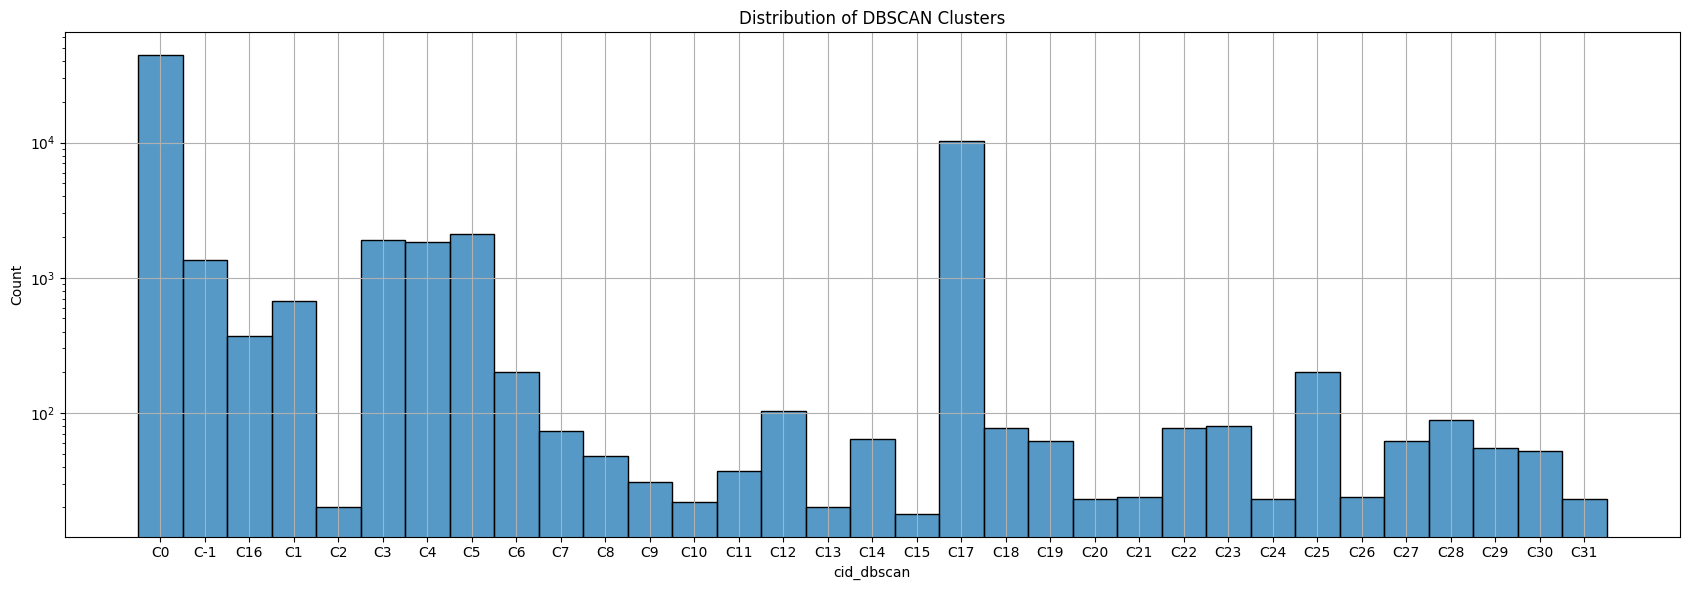

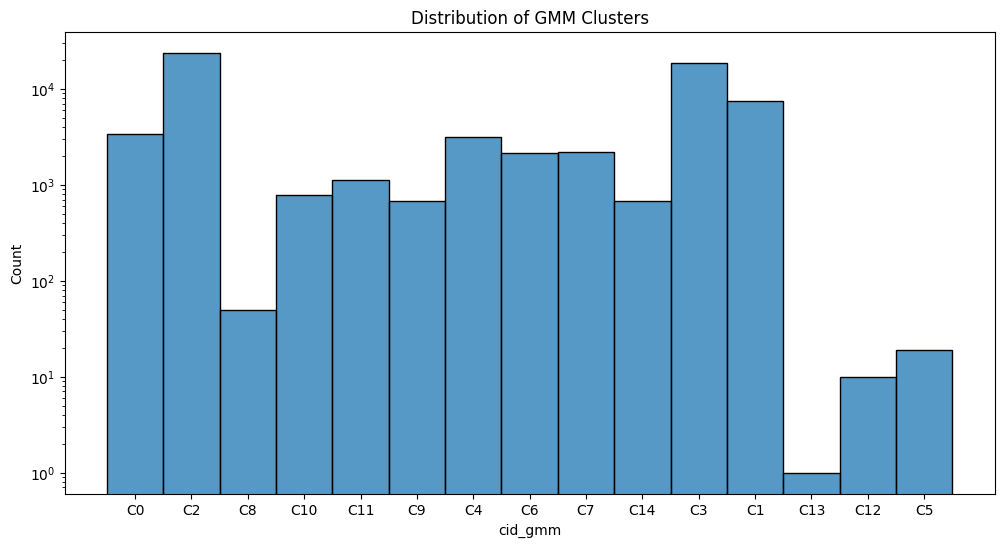

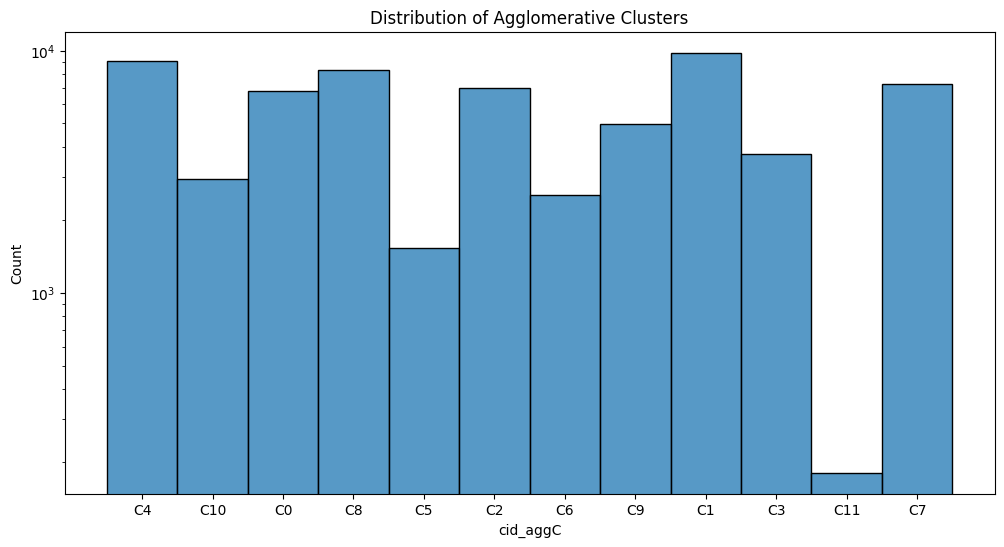

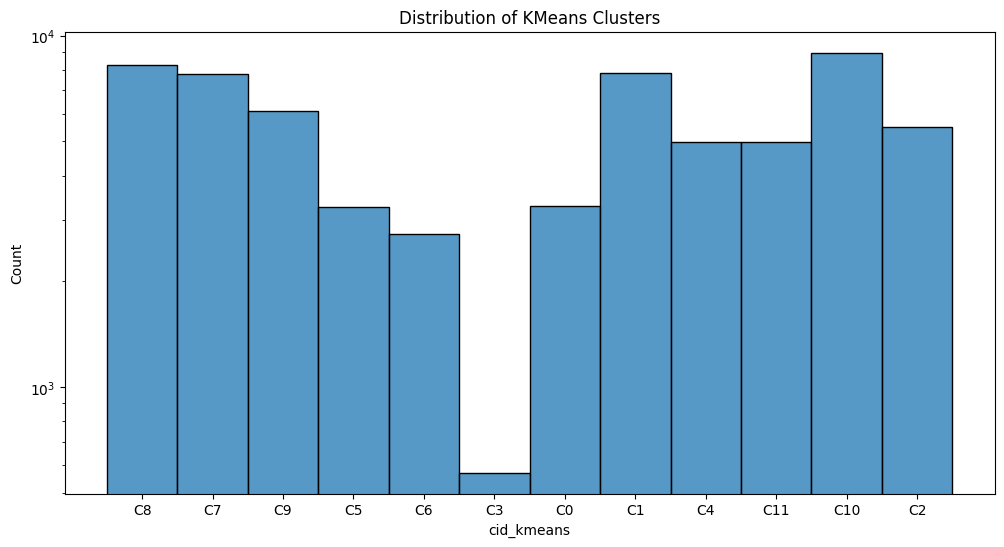

In [11]:
cluster_df = df

plt.figure(figsize=(17, 6))
sns.histplot(x='cid_dbscan', data=cluster_df)
plt.title('Distribution of DBSCAN Clusters')
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize the distribution of GMM clusters
plt.figure(figsize=(12, 6))
sns.histplot(x='cid_gmm', data=cluster_df)
plt.yscale('log')
plt.title('Distribution of GMM Clusters')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(x='cid_aggC', data=cluster_df)
plt.yscale('log')
plt.title('Distribution of Agglomerative Clusters')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(x='cid_kmeans', data=cluster_df)
plt.yscale('log')
plt.title('Distribution of KMeans Clusters')
plt.show()

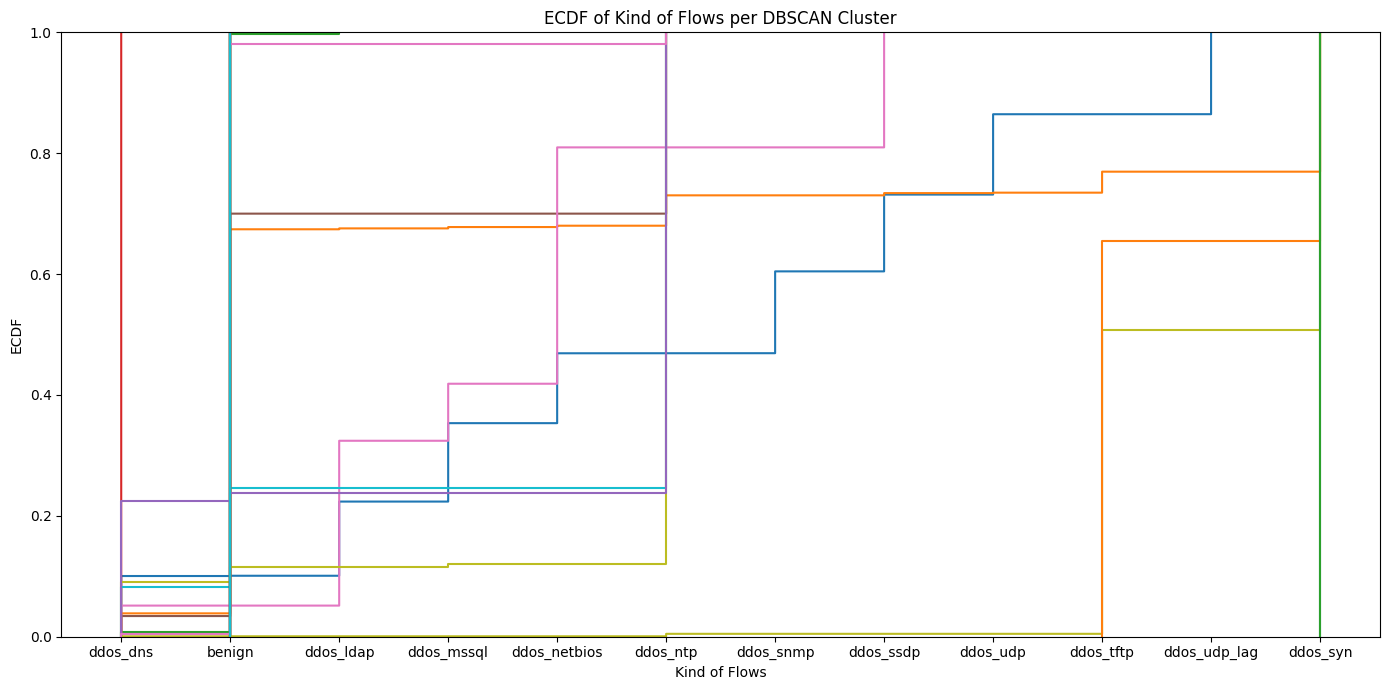

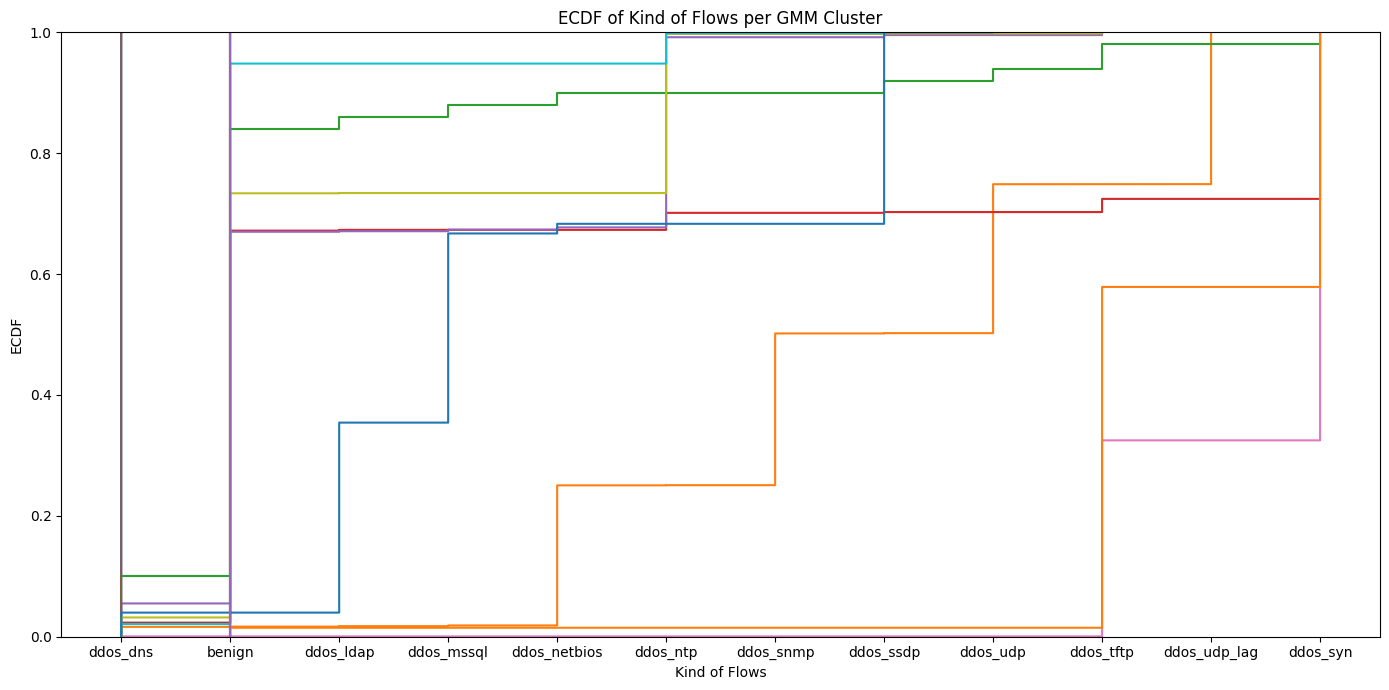

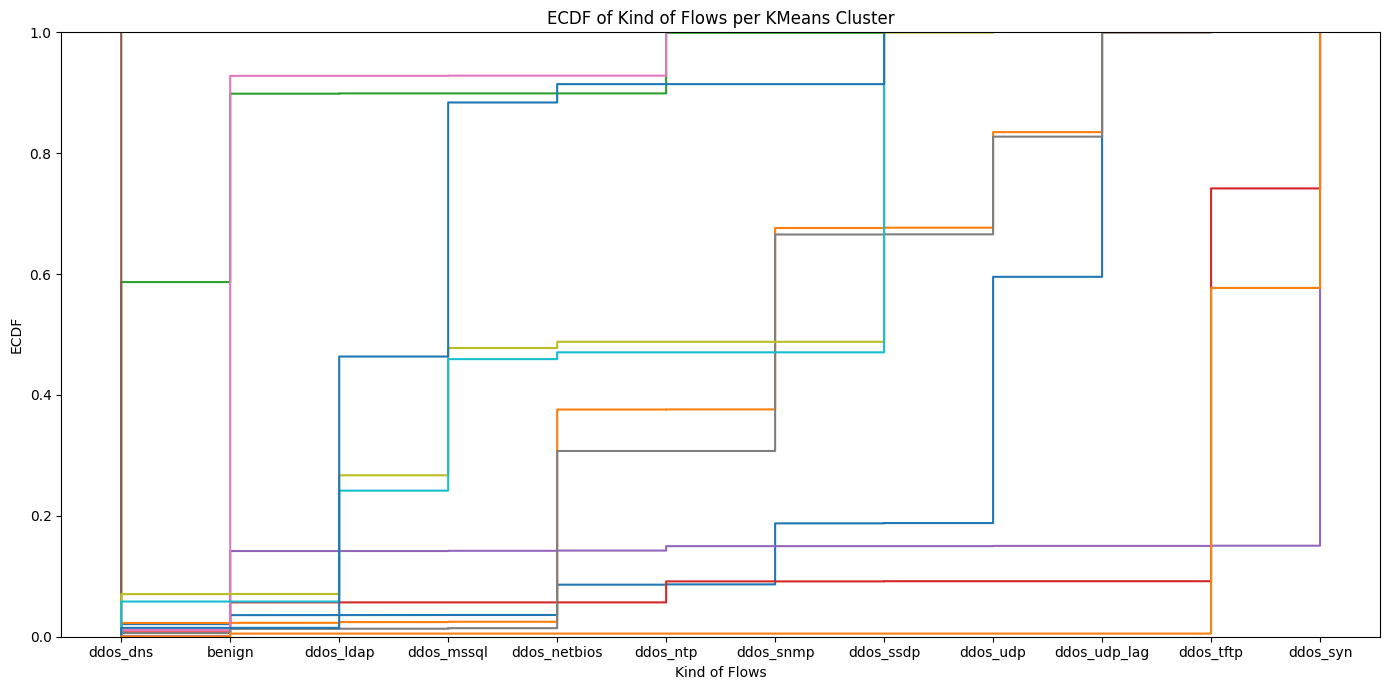

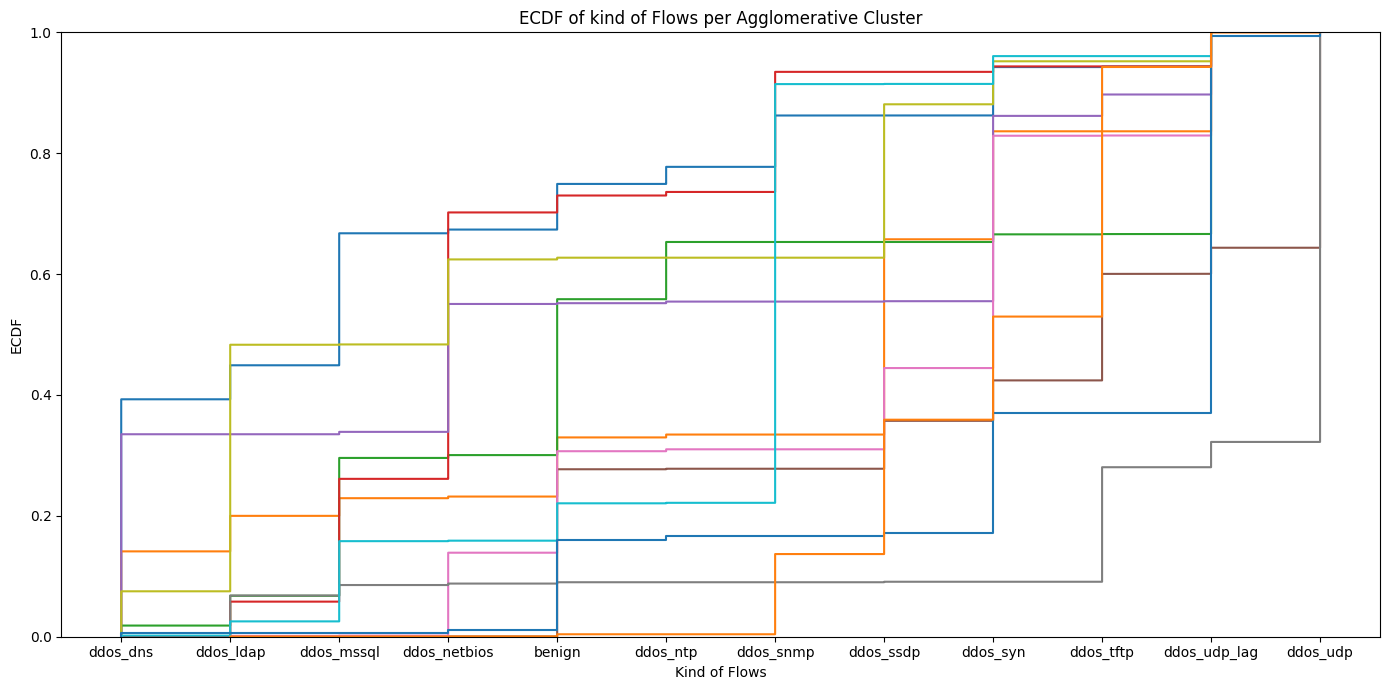

In [13]:
plt.figure(figsize=(14, 7))
# DBSCAN
for label in cluster_df['cid_dbscan'].unique():
    flows_per_cluster = cluster_df[cluster_df['cid_dbscan'] == label]['label']  
    sns.ecdfplot(flows_per_cluster, label=f'DBSCAN Cluster {label}')


plt.title('ECDF of Kind of Flows per DBSCAN Cluster')
plt.xlabel('Kind of Flows')
plt.ylabel('ECDF')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,7))
# GMM
for label in cluster_df['cid_gmm'].unique():
    flows_per_cluster = cluster_df[cluster_df['cid_gmm'] == label]['label']  
    sns.ecdfplot(flows_per_cluster, label=f'GMM Cluster {label}')


plt.title('ECDF of Kind of Flows per GMM Cluster')
plt.xlabel('Kind of Flows')
plt.ylabel('ECDF')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,7))
# KMeans
for label in cluster_df['cid_kmeans'].unique():
    flows_per_cluster = cluster_df[cluster_df['cid_kmeans'] == label]['label']  
    sns.ecdfplot(flows_per_cluster, label=f'KMeans Cluster {label}')


plt.title('ECDF of Kind of Flows per KMeans Cluster')
plt.xlabel('Kind of Flows')
plt.ylabel('ECDF')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,7))
# GMM
for label in cluster_df['cid_aggC'].unique():
    flows_per_cluster = cluster_df[cluster_df['cid_aggC'] == label]['label']  
    sns.ecdfplot(flows_per_cluster, label=f'Agglomerative Cluster {label}')


plt.title('ECDF of kind of Flows per Agglomerative Cluster')
plt.xlabel('Kind of Flows')
plt.ylabel('ECDF')
plt.tight_layout()
plt.show()